# ***Creating and Testing a Non-Deterministic Finite Automata (NFA) in Python using automata-lib***

**1. Install the latest version of Automata Library**

In [1]:
pip install automata-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 1.2 MB/s eta 0:00:00


**2. Import the NFA class from the automata.fa.nfa module.**

In [2]:
from automata.fa.nfa import NFA

**3. Define the NFA with it's states.**

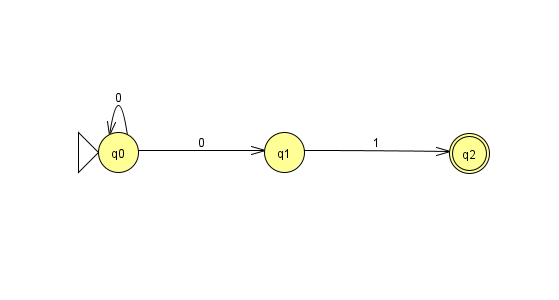

* **states**
* **input symbols**
* **transitions**
* **initial states**
* ***final states***

In [20]:
class NFA:
    def __init__(self, states, input_symbols, transitions, initial_state, final_states):
        self.states = states
        self.input_symbols = input_symbols
        self.transitions = transitions
        self.initial_state = initial_state
        self.final_states = final_states

    def is_accepted(self, input_str):
        current_states = {self.initial_state}

        for symbol in input_str:
            if symbol not in self.input_symbols:
                return False  # Reject if the symbol is not in the input alphabet

            next_states = set()

            for state in current_states:
                if state in self.transitions and symbol in self.transitions[state]:
                    next_states.update(self.transitions[state][symbol])

            current_states = next_states

        return any(state in self.final_states for state in current_states)

nfa_example = NFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': {'q0', 'q1'}},
        'q1': {'1': {'q2'}},
        'q2': {'0': set(), '1': set()},
    },
    initial_state='q0',
    final_states={'q0', 'q2'}
)

**4. Define a function is_accepted to check if a given input string is accepted by the DFA.**

In [21]:
def is_accepted_example(input_str, nfa_instance):
    return nfa_instance.is_accepted(input_str)

**5. Test the DFA with a list of strings**

In [22]:
test_strings = ['010', '100', '1011', '1101', '0011']

for test_str in test_strings:
    if is_accepted_example(test_str, nfa_example):
        print(f'String "{test_str}" is accepted.')
    else:
        print(f'String "{test_str}" is not accepted.')

String "010" is not accepted.
String "100" is not accepted.
String "1011" is not accepted.
String "1101" is not accepted.
String "0011" is not accepted.
